In [1]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
!pip install statsmodels

Loading Portland Housing Price Prediction Dataset

In [2]:
ptlnd = pd.read_csv('ex1data2.txt',header=None)
# ptval = ptlnd.iloc[:,2].values
# ptindex = ptlnd.iloc[:,0].values

In [3]:
# pt = pd.Series(ptval,index=ptindex)

installing statsmodels and its dependencies

In [3]:
 import statsmodels.api as sm
from patsy import dmatrices
# patsy is a Python library for describing statistical models and building Design Matrices

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
ptlnd.columns

Index(['Living_area', 'bedrooms', 'Price'], dtype='object')

In [8]:
# renaming columns
ptlnd.rename(columns={0:'Living_area',1:'bedrooms',2:'Price'},inplace=True)

In [10]:
ptlnd.columns

Index(['Living_area', 'bedrooms', 'Price'], dtype='object')

create two design matrices to fit estimated model (OLS)
- $y$ : matrix of endogenous variables (dependent), $N \times 1$ column data ~ Price
- $X$ : matrix exogenous varaibles (independent), $N \times 3$ column data ~ y-Intercept, Living Area, #bedrooms

In [11]:

y, X = dmatrices('Price ~ Living_area + bedrooms',data=ptlnd,return_type='dataframe')

Design Matrices

In [14]:
y.head()

,Price
0,399900.0
1,329900.0
2,369000.0
3,232000.0
4,539900.0


In [15]:
X.head()

,Intercept,Living_area,bedrooms
0,1.0,2104.0,3.0
1,1.0,1600.0,3.0
2,1.0,2400.0,3.0
3,1.0,1416.0,2.0
4,1.0,3000.0,4.0


Model fit and summary
- Describe, fit and summarize model using Ordinary Least Squares (OLS)

In [17]:
# describe model
mod = sm.OLS(y,X)

# fit model
res = mod.fit()

# Summarize model
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     60.38
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           2.43e-13
Time:                        14:40:19   Log-Likelihood:                -586.77
No. Observations:                  47   AIC:                             1180.
Df Residuals:                      44   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     8.96e+04   4.18e+04      2.145      

Extracting parameter estimates and $r^2$

In [18]:
res.params

Intercept      89597.909543
Living_area      139.210674
bedrooms       -8738.019112
dtype: float64

In [19]:
res.rsquared

0.7329450180289142

Applying Rainbow Test for Linearity
- The basic idea of the Rainbow test is that even if the true relationship is non-linear, a good linear fit can be achieved on a subsample in the "middle" of the data

In [21]:
sm.stats.linear_rainbow(res)

(0.49348806706947385, 0.9499682609135575)

Draw a plot of partial regression for a set of regressors

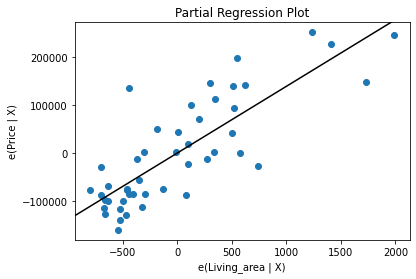

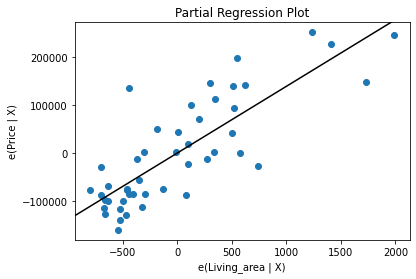

In [20]:
sm.graphics.plot_partregress('Price','Living_area',['bedrooms'],data=ptlnd,obs_labels=False)